In [40]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
# api.competition_download_files('dogs-vs-cats',path='../data/raw')

In [41]:
import zipfile 
import os

with zipfile.ZipFile('../data/raw/dogs-vs-cats.zip','r') as file:
    file.extractall('../data/raw/unzipped')

with zipfile.ZipFile('../data/raw/unzipped/test1.zip','r') as file:
    file.extractall('../data/raw/unzipped/test/')


with zipfile.ZipFile('../data/raw/unzipped/train.zip','r') as file:
    file.extractall('../data/raw/unzipped/')

In [42]:
import re
import shutil
import pathlib
cat_folder = 'cat'
dog_folder = 'dog'
x = None
if x:
    for dirname,filename,image in os.walk('../data/raw/unzipped/train'):
        print(f'{len(filename)} is {len(image)} in {dirname}')
        # print(str(image))

        if os.path.exists('data/raw/unzipped/train1'):
            break
        else:
            os.makedirs('data/raw/unzipped/rain1',exist_ok=True)
            for i in image:
                if str(i).split('.')[0] == cat_folder:
                    shutil.copy(os.path.join(str(dirname),str(i)),dst='../data/raw/unzipped/train1/cat')
            
                elif str(i).split('.')[0] == dog_folder:
                    shutil.copy(os.path.join(str(dirname),str(i)),dst='../data/raw/unzipped/train1/dog')
                
    

In [43]:
import torch
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms,models

In [44]:
transforms_train = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.AutoAugment(),
    transforms.ToTensor()
])
transforms_test = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [45]:
train_dataset = datasets.ImageFolder('../data/raw/unzipped/train1',transform=transforms_test)

In [46]:
train_dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [47]:
test_dataset = datasets.ImageFolder('../data/raw/unzipped/test',transform=transforms_test)

In [48]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 25000
    Root location: ../data/raw/unzipped/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [49]:
img,label = train_dataset[0]

In [50]:
TRAIN_SIZE = int((len(train_dataset)*0.8))
VALIDATION_SIZE = int(len(train_dataset)*0.2)

In [51]:
TRAIN_SIZE

20000

In [52]:
train_dataset,validation_dataset = torch.utils.data.random_split(train_dataset,[TRAIN_SIZE,VALIDATION_SIZE])

In [53]:
img,label = validation_dataset[0]

In [54]:
img

tensor([[[0.1451, 0.1647, 0.1765,  ..., 0.0314, 0.0314, 0.0314],
         [0.1647, 0.1765, 0.1922,  ..., 0.0980, 0.0667, 0.0471],
         [0.1608, 0.1686, 0.1843,  ..., 0.7216, 0.6745, 0.6275],
         ...,
         [0.0863, 0.1294, 0.1608,  ..., 0.0784, 0.0667, 0.0549],
         [0.0471, 0.1098, 0.1843,  ..., 0.1137, 0.1451, 0.0902],
         [0.0627, 0.2078, 0.4549,  ..., 0.1098, 0.1490, 0.0941]],

        [[0.2000, 0.2275, 0.2471,  ..., 0.0235, 0.0235, 0.0235],
         [0.2157, 0.2392, 0.2627,  ..., 0.1020, 0.0784, 0.0627],
         [0.2039, 0.2235, 0.2510,  ..., 0.7529, 0.7176, 0.6745],
         ...,
         [0.0824, 0.0941, 0.0824,  ..., 0.0510, 0.0431, 0.0314],
         [0.0549, 0.0627, 0.0902,  ..., 0.0588, 0.0824, 0.0235],
         [0.0510, 0.1373, 0.3255,  ..., 0.0471, 0.0784, 0.0275]],

        [[0.3569, 0.3804, 0.4196,  ..., 0.0314, 0.0196, 0.0157],
         [0.4039, 0.4118, 0.4392,  ..., 0.0941, 0.0745, 0.0549],
         [0.4275, 0.4157, 0.4275,  ..., 0.6549, 0.6314, 0.

In [55]:
import torch
from torch import nn
import torchinfo
device = "cuda" if torch.cuda.is_available() else "cpu"

In [56]:
device

'cuda'

In [57]:
class TinyVGGV0(nn.Module):
    def __init__(self,input_features,hidden_state,output_features):
        super().__init__()
        
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )

        self.conv_layer_2 = nn.Sequential(
                   nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*16*16,out_features=output_features)
        )

    def forward(self,x):
        x = self.conv_layer_1(x)
        # print(f' After first conv1 layer : {x.shape}')
        x = self.conv_layer_2(x)
        # print(f' After second conv2 layer : {x.shape}')
        return self.layer_stack(x)

In [58]:
BATCH_SIZE = 32
train_dataset_laoder = DataLoader(train_dataset,BATCH_SIZE,shuffle=True,num_workers=0)
validation_dataset_loader = DataLoader(validation_dataset,BATCH_SIZE,shuffle=False,num_workers=0)
Dtest_dataset_loader = DataLoader(test_dataset,BATCH_SIZE,shuffle=False,num_workers=0)

In [59]:
model_0 = TinyVGGV0(3,hidden_state=10,output_features=2).to(device)

In [60]:
torchinfo.summary(model_0,input_size=[32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGV0                                [32, 2]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [61]:

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_0.parameters())

In [62]:
def train_step(model,dataloader,loss_fn,optimizer,device=device):
    model.train()

    train_loss,train_accuracy = 0,0

    for batch,(X,y) in enumerate(dataloader):

        X,y = X.to(device),y.to(device)

        y_preds = model(X)

        loss = loss_fn(y_preds,y)

        train_loss += loss.item()

        accuracer = torch.argmax(torch.softmax(y_preds,dim=1),dim=1)

        train_accuracy += (accuracer==y).sum().item()/len(y_preds)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)
    return train_loss,train_accuracy

In [63]:
def validation_step(model,dataloader,loss_fn,device=device):
    model.eval()

    test_loss,test_accuracy = 0,0

    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device),y.to(device)

            y_pred = model(X)

            loss  = loss_fn(y_pred,y)

            test_loss += loss.item()

            y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)

            test_accuracy += (y_pred_class == y).sum().item()/len(y_pred)

        test_loss /= len(dataloader)
        test_accuracy /= len(dataloader)
        return test_loss,test_accuracy

In [64]:
def train_model(model,train_loader,test_loader,loss_fn,optimizer,epochs,device=device):
    from tqdm.auto import tqdm
    results = {"train_loss" : [],
               "train_acc": [],
               "test_loss": [],
               "test_acc":[]}
    for epoch in tqdm(range(epochs)):
        print(f'Epoch {epoch} ---------------\n')

        train_loss,train_accuracy = train_step(model,train_loader,loss_fn,optimizer,device=device)
        test_loss,test_accuracy = validation_step(model,test_loader,loss_fn,device=device)

        print(f'Train Loss {train_loss} Train Accuracy {train_accuracy} \n Test Loss {test_loss} Test Accuracy {test_accuracy}')

        results["test_loss"].append(test_loss)
        results['test_acc'].append(test_accuracy)
        results['train_acc'].append(train_accuracy)
        results['train_loss'].append(train_loss)

    return results

In [65]:
# results = train_model(model_0,train_loader=train_dataset_laoder,test_loader=validation_dataset_loader,loss_fn=loss_fn,optimizer=optim,epochs=10,device=device)

In [66]:
from torchvision import models

In [67]:
model = models.efficientnet_b0(weights = models.EfficientNet_B0_Weights.DEFAULT)

In [68]:
models.EfficientNet_B0_Weights.DEFAULT.transforms()


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [69]:
def EfficienNet_model(fine_tuned= True,num_classes=2):
    model = models.efficientnet_b0(weights = models.EfficientNet_B0_Weights.DEFAULT)

    if fine_tuned:
        print('[INFO] Fine-tuning all-layers..')
        for params in model.features.parameters():
            params.requires_grad = True
    elif not fine_tuned:
        print('[INFO]: Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False

    model.classifier[1] = nn.Linear(in_features=1280,out_features= num_classes)
    return model

In [70]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [71]:
weights = models.EfficientNet_B0_Weights.DEFAULT
transform_efficient_net = weights.transforms()


In [72]:
models.EfficientNet_B0_Weights.DEFAULT.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [73]:
train_dataset = datasets.ImageFolder('../data/raw/unzipped/train1',transform=transform_efficient_net)
test_dataset = datasets.ImageFolder('../data/raw/unzipped/test',transform=transform_efficient_net)
train_dataset,validation_dataset = torch.utils.data.random_split(train_dataset,[TRAIN_SIZE,VALIDATION_SIZE])

In [74]:
train_dataset_laoder = DataLoader(train_dataset,BATCH_SIZE,shuffle=True,num_workers=0)
validation_dataset_loader = DataLoader(validation_dataset,BATCH_SIZE,shuffle=False,num_workers=0)
test_dataset_loader = DataLoader(test_dataset,BATCH_SIZE,shuffle=False,num_workers=0)

In [75]:
model_1 =  EfficienNet_model(fine_tuned= True).to(device)

[INFO] Fine-tuning all-layers..


In [76]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_1.parameters())

In [77]:
device

'cuda'

In [78]:
results_Efficient_NET = train_model(model_1,train_loader=train_dataset_laoder,test_loader=validation_dataset_loader,loss_fn=loss_fn,optimizer=optim,epochs=5,device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 ---------------



 20%|██        | 1/5 [03:01<12:04, 181.03s/it]

Train Loss 0.11366192388944328 Train Accuracy 0.9554 
 Test Loss 0.064903525693437 Test Accuracy 0.9743232484076433
Epoch 1 ---------------



 40%|████      | 2/5 [06:21<09:37, 192.64s/it]

Train Loss 0.06706531718811021 Train Accuracy 0.974 
 Test Loss 0.0664240698553759 Test Accuracy 0.9767117834394905
Epoch 2 ---------------



 60%|██████    | 3/5 [09:20<06:12, 186.17s/it]

Train Loss 0.055425305071193726 Train Accuracy 0.978 
 Test Loss 0.07116933773091184 Test Accuracy 0.9737261146496815
Epoch 3 ---------------



 80%|████████  | 4/5 [12:18<03:02, 182.93s/it]

Train Loss 0.05163884782763198 Train Accuracy 0.9816 
 Test Loss 0.11134898901181474 Test Accuracy 0.9727308917197452
Epoch 4 ---------------



100%|██████████| 5/5 [15:16<00:00, 183.24s/it]

Train Loss 0.041587988910562125 Train Accuracy 0.985 
 Test Loss 0.07396219900081076 Test Accuracy 0.9759156050955414


In [84]:
def show_models(results):
    import matplotlib.pyplot as plt
    epochs = range(len(results['test_loss']))
    plt.subplot(1,2,1)
    plt.plot(epochs,results['test_loss'],label='test_loss')
    plt.plot(epochs,results['train_loss'],label='train_loss')
    plt.legend()
    plt.title('Loss')
    plt.subplot(1,2,2)
    plt.plot(epochs,results['train_acc'],label='train_acc')
    plt.plot(epochs,results['test_acc'],label='test_acc')
    plt.legend()
    plt.title('Accuracy')
    

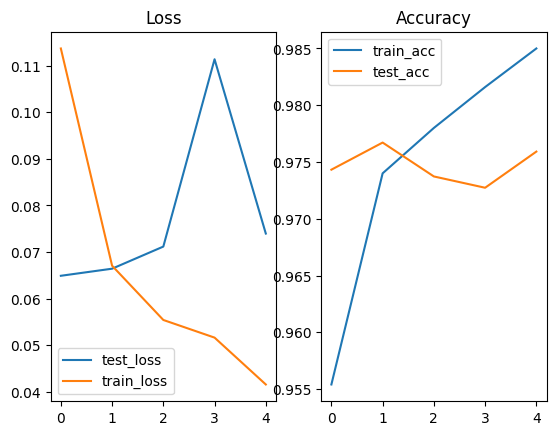

In [153]:
show_models(results_Efficient_NET)

In [102]:
next(iter(train_dataset_laoder))[1]

tensor([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 1])

In [103]:
classes = ['cat','dog']

In [180]:
import os
import pathlib
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_images(model,image_path,class_names = classes):

    img = Image.open(image_path)


    weights = models.EfficientNet_B0_Weights.DEFAULT
    transform_efficient_net = weights.transforms()

    weights = models.EfficientNet_B0_Weights.DEFAULT
    transform_efficient_net = weights.transforms()

    # Przekształcamy obraz tylko tutaj:
    transformed_image = transform_efficient_net(img).unsqueeze(dim=0)


    
    model.to(device)

    model.eval()

    with torch.inference_mode():



        target_image_pred = model(transformed_image.to(device))
        print(target_image_pred.shape)
        output = torch.argmax(torch.softmax(target_image_pred,dim=1),dim=1)

        print(output)
        plt.figure(figsize=(12,6))

        plt.imshow(img)

        plt.title(f'Pred: {class_names[int(output.cpu())]} ')
    
    

In [181]:
paths = list(pathlib.Path('../data/raw/unzipped/test/Unlabeled').glob('*.jpg'))


In [182]:
import torch

In [258]:
x = random.choice(paths)
x

WindowsPath('../data/raw/unzipped/test/Unlabeled/11675.jpg')

torch.Size([1, 2])
tensor([1], device='cuda:0')


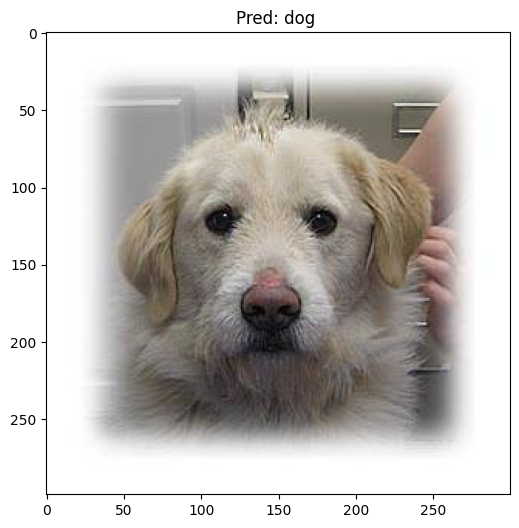

In [261]:
x = random.choice(paths)
plot_images(model_1,'../data/raw/unzipped/test/Unlabeled/3.jpg')

In [298]:
path =sorted(list(Path('../data/raw/unzipped/test/test1').glob('*.jpg')),key = lambda x: int((x.stem)))

In [299]:
    img = Image.open(path[0])

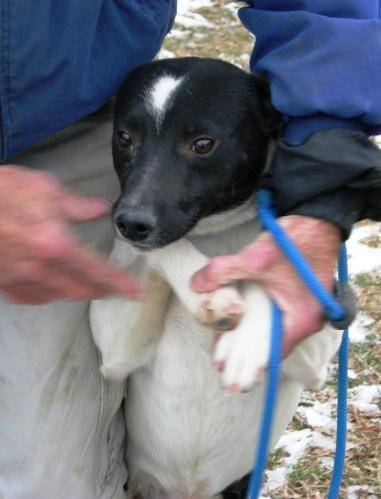

In [300]:
img

In [307]:
model_1.eval()
results =  []
with torch.inference_mode():
    for X in path:
        img = Image.open(X)
 
        weights = models.EfficientNet_B0_Weights.DEFAULT
        transform_efficient_net = weights.transforms()

        # Przekształcamy obraz tylko tutaj:
        transformed_image = transform_efficient_net(img).unsqueeze(0)
        transformed_image = transformed_image.to(device)
        logits = model_1(transformed_image)
        prob_dog = torch.softmax(logits[0], dim=0)[1].item()
        print(prob_dog)
        results.append(prob_dog)



1.0
1.0
0.9999998807907104
1.0
6.011848199705128e-06
7.251600891322596e-06
3.588124286579841e-08
1.4711786207044497e-06
7.259243761659206e-10
3.71943087440485e-10
1.6440127410533023e-06
0.9999996423721313
1.4797000176258734e-06
0.0005063535063527524
3.937503934015041e-10
7.245685264933854e-05
0.9829209446907043
0.9999972581863403
6.587289602677515e-10
3.737912757095785e-11
0.9999871253967285
5.6950810289890796e-08
1.0
0.9994555115699768
1.8771163468045415e-06
0.9999995231628418
0.9999969005584717
2.5823632121557694e-09
0.5066208839416504
0.99960857629776
0.9999972581863403
0.035595402121543884
0.9919437170028687
1.6212081277444668e-07
2.258319398151798e-07
1.3983073188228445e-07
1.4273382475948893e-09
5.209067066580531e-10
0.9997119307518005
5.5617239980154665e-11
1.0
1.0
1.0
1.0
4.728024638467332e-10
0.8706938624382019
1.136897131992498e-09
1.0
1.0
5.510243681783322e-06
6.16241502271464e-10
1.6836094740568797e-09
4.559735256037811e-09
4.481281734580733e-10
2.5096855438278e-07
0.999849

In [308]:
int(results[0].cpu())

AttributeError: 'float' object has no attribute 'cpu'

In [309]:
results[0]

1.0

In [310]:
results = [int(i.cpu()) for i in results]

AttributeError: 'float' object has no attribute 'cpu'

In [311]:
results[0]

1.0

In [312]:
results

[1.0,
 1.0,
 0.9999998807907104,
 1.0,
 6.011848199705128e-06,
 7.251600891322596e-06,
 3.588124286579841e-08,
 1.4711786207044497e-06,
 7.259243761659206e-10,
 3.71943087440485e-10,
 1.6440127410533023e-06,
 0.9999996423721313,
 1.4797000176258734e-06,
 0.0005063535063527524,
 3.937503934015041e-10,
 7.245685264933854e-05,
 0.9829209446907043,
 0.9999972581863403,
 6.587289602677515e-10,
 3.737912757095785e-11,
 0.9999871253967285,
 5.6950810289890796e-08,
 1.0,
 0.9994555115699768,
 1.8771163468045415e-06,
 0.9999995231628418,
 0.9999969005584717,
 2.5823632121557694e-09,
 0.5066208839416504,
 0.99960857629776,
 0.9999972581863403,
 0.035595402121543884,
 0.9919437170028687,
 1.6212081277444668e-07,
 2.258319398151798e-07,
 1.3983073188228445e-07,
 1.4273382475948893e-09,
 5.209067066580531e-10,
 0.9997119307518005,
 5.5617239980154665e-11,
 1.0,
 1.0,
 1.0,
 1.0,
 4.728024638467332e-10,
 0.8706938624382019,
 1.136897131992498e-09,
 1.0,
 1.0,
 5.510243681783322e-06,
 6.1624150227146

In [313]:
import pandas as pd

In [314]:
index = [i+1 for i in range(len(results))]

In [315]:
df = pd.DataFrame(results,columns = ['label'],index=index)

In [316]:
df.to_csv('results.csv')